In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

print('ready')

ready


In [2]:
url="./Data set/africa_food_prices.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [44]:
df.shape

(956779, 17)

In [8]:
df.drop(["Unnamed: 0","mp_commoditysource"], axis=1, inplace=True)

In [9]:
df.shape

(956779, 17)

In [11]:
df.columns

Index(['country_id', 'country', 'state_id', 'state', 'market_id', 'market',
       'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price'],
      dtype='object')

In [12]:
df.state.replace(np.nan, "State Unknown", inplace=True)

In [13]:
print(df.produce)

0                   Rice - Retail
1                   Rice - Retail
2                   Rice - Retail
3                   Rice - Retail
4                   Rice - Retail
                   ...           
956774     Beans (sugar) - Retail
956775        Toothpaste - Retail
956776      Laundry soap - Retail
956777     Handwash soap - Retail
956778    Fish (kapenta) - Retail
Name: produce, Length: 956779, dtype: object


In [14]:
type(df.produce[0])

str

In [15]:
df.produce[1]

'Rice - Retail'

In [17]:
temp = df ["produce"].str.split("- ",n=1, expand=True)

In [18]:
temp.head()

,0,1
0,Rice,Retail
1,Rice,Retail
2,Rice,Retail
3,Rice,Retail
4,Rice,Retail


In [19]:
df['produce'] = temp[0]

In [20]:
print(df.produce)

0                   Rice 
1                   Rice 
2                   Rice 
3                   Rice 
4                   Rice 
               ...       
956774     Beans (sugar) 
956775        Toothpaste 
956776      Laundry soap 
956777     Handwash soap 
956778    Fish (kapenta) 
Name: produce, Length: 956779, dtype: object


In [21]:
df.isnull().sum()

country_id     0
country        0
state_id       0
state          0
market_id      0
market         0
produce_id     0
produce        0
currency_id    0
currency       0
pt_id          0
market_type    0
um_unit_id     0
quantity       0
month          0
year           0
price          0
dtype: int64

In [22]:
df.describe()

,country_id,state_id,market_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price
count,956779.000000,956779.000000,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05
mean,1961.192782,22287.911831,1392.594222,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03
std,10404.034922,98565.608270,1027.751212,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05
min,4.000000,0.000000,101.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00
25%,90.000000,1836.000000,528.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01
50%,155.000000,2209.000000,1078.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02
75%,205.000000,21971.000000,2281.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02
max,70001.000000,900003.000000,6081.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07


In [23]:
df.duplicated().sum()

0

In [24]:
df.year.unique()

array([2015, 2016, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2017, 2018,
       2019, 2020, 2002, 2003, 2005, 2006, 2007, 2021, 2004, 2000, 2001,
       1994, 1995, 1996, 1997, 1998, 1999, 1992, 1993, 1990, 1991],
      dtype=int64)

In [25]:
df.year.value_counts()

2020    156199
2019     99606
2021     91234
2018     81720
2015     71853
2017     66916
2014     65238
2013     61206
2016     52378
2012     48916
2011     36103
2010     27993
2009     24725
2008     20968
2007     15266
2006      9421
2005      5832
2004      4750
2003      4356
2002      2153
2001      1770
2000      1319
1998      1224
1999      1182
1997      1065
1996      1045
1995       924
1994       843
1993       152
1992       148
1990       140
1991       134
Name: year, dtype: int64

In [26]:
df.country.unique()

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'Congo', 'Djibouti', 'Egypt',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [46]:
df2= df[df["year"]>2016]
df2.head()

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
1901,8.0,Angola,408,Luanda,2593,Luanda,55,Bread,0.0,AOA,15,Retail,33,Unit,1,2017,88.68
1902,8.0,Angola,408,Luanda,2593,Luanda,55,Bread,0.0,AOA,15,Retail,33,Unit,2,2017,89.40
1903,8.0,Angola,408,Luanda,2593,Luanda,55,Bread,0.0,AOA,15,Retail,33,Unit,3,2017,89.73
1904,8.0,Angola,408,Luanda,2593,Luanda,55,Bread,0.0,AOA,15,Retail,33,Unit,4,2017,89.92
1905,8.0,Angola,408,Luanda,2593,Luanda,55,Bread,0.0,AOA,15,Retail,33,Unit,5,2017,90.03


In [47]:
df3= df2[df2["country"] =='Nigeria']
df3.head()

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
605315,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread,0.0,NGN,15,Retail,33,Unit,1,2017,300.0
605316,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread,0.0,NGN,15,Retail,33,Unit,2,2017,309.0
605317,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread,0.0,NGN,15,Retail,33,Unit,3,2017,300.0
605318,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread,0.0,NGN,15,Retail,33,Unit,4,2017,300.0
605319,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread,0.0,NGN,15,Retail,33,Unit,5,2017,308.0


In [48]:
df3.to_csv("./Data set/Nigeria Food Prices From 2017.csv", index=False)

In [49]:
df3.produce.value_counts()

Millet                          2041
Rice (local)                    1966
Rice (imported)                 1870
Yam                             1819
Oil (palm)                      1657
Maize (white)                   1089
Sorghum (white)                 1075
Cowpeas (white)                 1060
Groundnuts (shelled)            1056
Gari (white)                    1050
Sorghum (brown)                 1044
Maize (yellow)                  1010
Cowpeas (brown)                  995
Sorghum                          952
Groundnuts                       949
Oil (vegetable)                  948
Maize flour                      946
Beans (white)                    944
Milk                             942
Meat (goat)                      942
Meat (beef)                      942
Onions                           942
Fish                             940
Beans (red)                      936
Eggs                             933
Oranges                          928
Watermelons                      927
C

In [50]:
Y= df3["produce"].value_counts().head()
Y

Millet              2041
Rice (local)        1966
Rice (imported)     1870
Yam                 1819
Oil (palm)          1657
Name: produce, dtype: int64

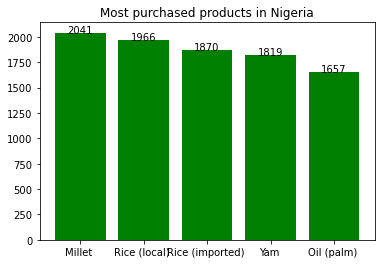

In [51]:
plt.bar(Y.index,Y.values,color='g')
for i in range(len(Y)):
    plt.text(i,Y[i],Y[i],ha='center')
    plt.title("Most purchased products in Nigeria")

In [52]:
df3.sort_values(by=["price"], ascending=False)[["state","produce","price"]]

,state,produce,price
636184,Yobe,Yam,90000.0
636183,Yobe,Yam,90000.0
609098,Borno,Yam,89000.0
609097,Borno,Yam,83000.0
623537,Kaduna,Yam,83000.0
...,...,...,...
645338,Yobe,Spinach,10.0
620913,Borno,Spinach,10.0
615492,Borno,Spinach,10.0
639106,Yobe,Spinach,10.0


In [53]:
temp2=pd.pivot_table(df3,index=["produce"], values="price")
temp2

,price
produce,
Bananas,195.174874
Beans (red),416.723825
Beans (white),380.618114
Bread,303.644649
"Cassava meal (gari, yellow)",11587.223353
Cowpeas,279.798923
Cowpeas (brown),16452.824461
Cowpeas (white),15174.324370
Eggs,1035.254829


Text(0.5, 1.0, 'Price of Products in Nigeria')

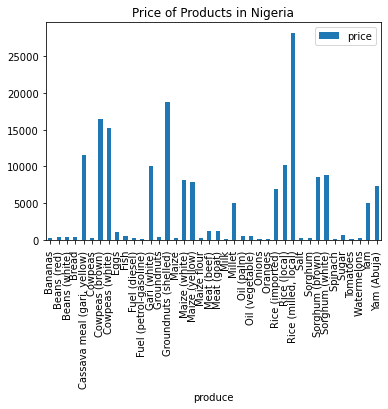

In [54]:
R=temp2.plot.bar()
plt.title("Price of Products in Nigeria")

In [43]:
pd.pivot_table(df3,index=["state", "produce"], values=["price"])

price
state   produce                                   
Abia    Bread                           100.000000
        Cassava meal (gari, yellow)   18354.240000
        Cowpeas (brown)               27141.632000
        Cowpeas (white)               25125.130750
        Fuel (diesel)                   256.375000
...                                            ...
Zamfara Rice (local)                  16679.401225
        Rice (milled, local)          25147.397312
        Sorghum (brown)                6430.052027
        Sorghum (white)                8200.529807
        Yam                            8775.013706

[268 rows x 1 columns]